# MAKING SENSE OF HUMAN DEVELOPMENT INDEX
by Gürsu GÜLCÜ

## Motivation

The U.N. reports that the **Human Development Index** (**HDI**) was created to emphasize that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone. The HDI is a summary measure of average achievement in key dimensions of human development:
**1–** *A long and healthy life,*
**2–** *Being knowledgeable,* 
**3–** *Having a decent standard of living.*

The **health** dimension is measured by *life expectancy at birth*. The **education** dimension is accounted for by incorporating both the *mean years of schooling* for adults aged 25+ years and the *expected years of schooling* for children entering the schooling age. The **standard of living** dimension is measured by *gross national income per capita* (GNI). 

The HDI uses the logarithm of the income to reflect the diminishing importance of income with increasing GNI. The scores for the three HDI dimension indices are then aggregated into a composite index by taking their geometric mean.



![alt text](./CalcHDI.jpg "Calculating the UN Human Development Index")

Let us attempt to investigate the usefulness of reporting each country’s HDI by comparing to other rankings. We shall especially try to see whether the calculation actually reflects what the name implies.

## Methodology

Below is a world map of HDI where countries with a higher Human Development Index are colored darker. In an attempt to judge HDI, we shall analyze its significance by asking what HDI shows statistically, which policies would increase it, implying what would possible benefits and shortcomings of focusing on HDI be.

![alt text](./2014_UN_Human_Development_Report.png "2014 UN Human Development Map")

The first question will be answered in comparison to another useful country ranking called Soft Power. Like HDI, Soft Power consist of sub-indices. Top 10 countries with respect to these six indices are shown below:

![alt text](./softpower1.jpg "Soft Power Top 10 and Breakdown into Sub-indices")

The **Digital** sub-index consists of metrics that capture both access to the internet in a given country, the effectiveness of the government’s provision of online services, and measures of digital diplomacy via social media . The **Government** sub-index uses a range of metrics that assesses political values like freedom, human rights, democracy, and equality. It also includes measures of government effectiveness and even citizen outcomes like Human Development Index scores!  The **Engagement** sub-index aims to measure the reach of states’ diplomatic network and their commitment to major challenges like development and the environment. The **Education** sub-index focuses on higher education and the extent to which universities are engaged and contributing internationally.  Metrics for the **Enterprise** sub-index aim to reflect the attractiveness of a country’s business model, capacity for innovation, and regulatory framework. Finally, the **Culture** sub-index is a measure of cultural influence a country has on others.



Let us now see the ranking of overall Soft Powers for top 30 countries, since this index is calculated for only those ones:

![alt text](./softranking.png "Soft Power Score for 30 Countries")

## A Statistical Analysis of HDI – SoftPower Relation

We hypothesize that generally a country exhibits a stronger soft power when it has a well-developed human potential, as defined and measured above. To test our hypothesis, we first calculate the correlations between each pair of HDI, Soft Power and their sub-indices.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
countries = pd.read_csv("GIIvHDI.csv")

In [3]:
countries

,Country,HDI,GII,LifeExp,AvgSchooling,GNI,SoftPower,Digital,Culture,Enterprise,Engagement,Education,Government
0,Norway,0.944,0.86,81.6,12.6,64992,57.96,54.77,22.82,59.70,46.72,50.42,86.98
1,Australia,0.935,0.89,82.4,13.0,42261,68.92,74.34,57.70,63.31,40.80,59.88,82.40
2,Switzerland,0.930,1.00,83.0,12.8,56431,67.52,35.67,44.75,79.88,45.05,64.44,88.29
3,Denmark,0.923,0.94,80.2,12.7,44025,63.20,65.86,34.02,69.97,44.63,57.63,85.77
4,Netherlands,0.922,0.98,81.6,11.9,45435,65.21,61.72,41.02,66.88,52.27,65.65,86.38
5,Germany,0.916,0.92,80.9,13.1,43919,73.89,72.23,60.61,65.99,64.85,70.66,84.52
6,Ireland,0.916,0.95,80.9,12.2,39568,55.61,47.26,32.24,64.60,34.57,46.81,80.84
7,USA,0.915,0.97,79.1,12.9,52947,73.68,83.42,81.87,66.40,62.41,87.58,70.18
8,New Zealand,0.913,0.90,81.8,12.5,32689,60.00,58.10,27.41,63.37,30.29,54.05,82.12
9,Canada,0.913,0.89,82.0,13.0,42155,71.71,68.52,52.66,60.42,47.92,73.46,81.59


In [4]:
HDIvSoft = countries.loc[:,["HDI","LifeExp","AvgSchooling","GNI","SoftPower","Digital","Culture","Enterprise","Engagement","Education","Government"]]
HDIvSoft.head()

,HDI,LifeExp,AvgSchooling,GNI,SoftPower,Digital,Culture,Enterprise,Engagement,Education,Government
0,0.944,81.6,12.6,64992,57.96,54.77,22.82,59.70,46.72,50.42,86.98
1,0.935,82.4,13.0,42261,68.92,74.34,57.70,63.31,40.80,59.88,82.40
2,0.930,83.0,12.8,56431,67.52,35.67,44.75,79.88,45.05,64.44,88.29
3,0.923,80.2,12.7,44025,63.20,65.86,34.02,69.97,44.63,57.63,85.77
4,0.922,81.6,11.9,45435,65.21,61.72,41.02,66.88,52.27,65.65,86.38


In [5]:
corHDIvSoft = HDIvSoft.corr(method='pearson')
corHDIvSoft

,HDI,LifeExp,AvgSchooling,GNI,SoftPower,Digital,Culture,Enterprise,Engagement,Education,Government
HDI,1.000000,0.816109,0.885250,0.793778,0.698910,0.472944,0.131180,0.763405,0.121124,0.440346,0.878745
LifeExp,0.816109,1.000000,0.574742,0.637909,0.587810,0.379893,0.083520,0.662766,0.056233,0.306634,0.698151
AvgSchooling,0.885250,0.574742,1.000000,0.601281,0.630043,0.485181,0.214231,0.673034,0.155702,0.534132,0.788592
GNI,0.793778,0.637909,0.601281,1.000000,0.575186,0.354290,0.103509,0.752323,0.058801,0.361537,0.577203
SoftPower,0.698910,0.587810,0.630043,0.575186,1.000000,0.578533,0.632010,0.595444,0.668714,0.818365,0.672729
Digital,0.472944,0.379893,0.485181,0.354290,0.578533,1.000000,0.473347,0.363508,0.316214,0.616892,0.274437
Culture,0.131180,0.083520,0.214231,0.103509,0.632010,0.473347,1.000000,0.056411,0.750109,0.757447,0.001796
Enterprise,0.763405,0.662766,0.673034,0.752323,0.595444,0.363508,0.056411,1.000000,0.022794,0.494396,0.639444
Engagement,0.121124,0.056233,0.155702,0.058801,0.668714,0.316214,0.750109,0.022794,1.000000,0.675555,0.230773
Education,0.440346,0.306634,0.534132,0.361537,0.818365,0.616892,0.757447,0.494396,0.675555,1.000000,0.334088


Below is the correlogram showing the calculations pictorially. Bright colors show a higher positive correlation coefficient.

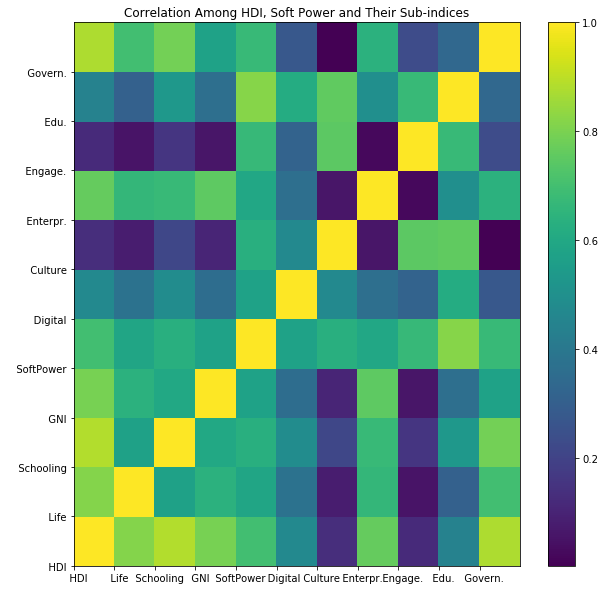

In [6]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
plt.title('Correlation Among HDI, Soft Power and Their Sub-indices')
labels=["   HDI","   Life","   Schooling","   GNI","   SoftPower",
        "     Digital","   Culture","   Enterpr.","   Engage.","   Edu.","   Govern."]
ax1.set(xticks=np.arange(len(labels)), xticklabels=labels)
ax1.set(yticks=np.arange(len(labels)), yticklabels=labels)
plt.pcolor(corHDIvSoft)
plt.colorbar();

The graph above can be plotted more easily using the Seaborn graphics library, as done with one line below.

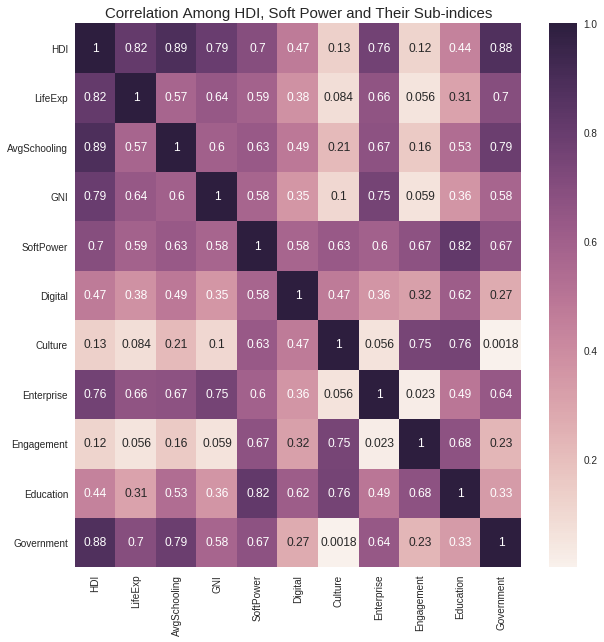

In [7]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
plt.title('Correlation Among HDI, Soft Power and Their Sub-indices', size=15)
sns.heatmap(corHDIvSoft,annot=True, annot_kws={"size":12});

In [8]:
corHDIvSoft.columns

Index(['HDI', 'LifeExp', 'AvgSchooling', 'GNI', 'SoftPower', 'Digital',
       'Culture', 'Enterprise', 'Engagement', 'Education', 'Government'],
      dtype='object')

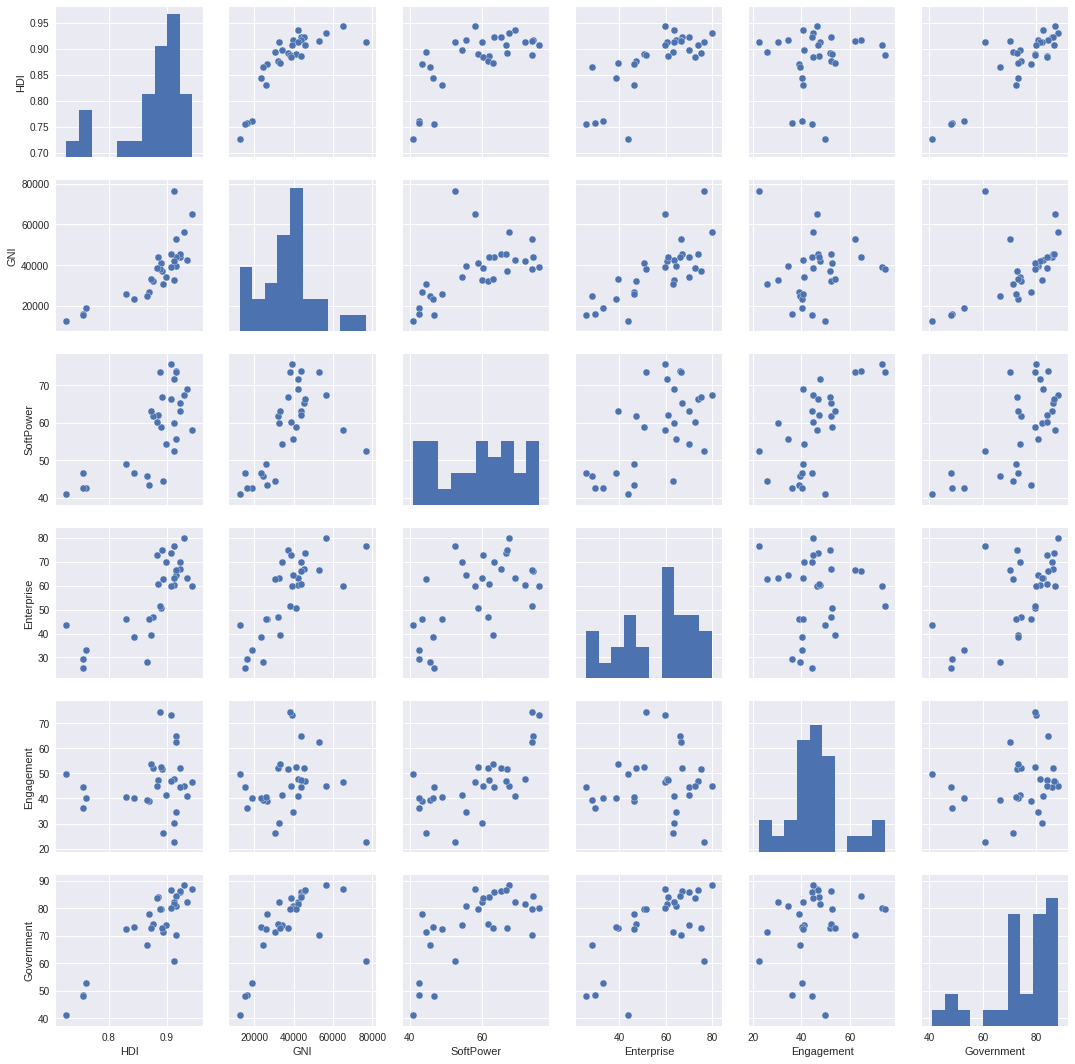

In [9]:
sns.pairplot(HDIvSoft.iloc[:,[0,3,4,7,8,10]])

HDI is to be positively correlated with Soft Power, especially with its Government sub index. However, the **Pearson correlation coefficient measures only linear relationships**. We are more interested in *how each measure ranks countries*, so we shall calculate rank correlation coefficients. We have two widely used ways of doing this.

The first one is **Spearman’s Correlation Coefficient Rho**, which measures the *strength of a monotonic relationship between paired data*. Unlike Pearson’s coefficeint, Spearman’s suffers from neither measuring only linearity, nor the normality requirement of the data analyzed. In other words, rather than comparing means and variances, Spearman's coefficient looks at the *relative order of values for each variable*. Below is what Spearman’s Rho is attempting to measure pictorially.

![alt text](./spearmansEx1.jpg "Rho Examples (-1, 0, and 1)")

![alt text](./spearmansEx2.jpg "Rho Examples (-0.94, and 0.37)")

The second one is **Kendall’s Tau**, which, like Spearman’s *measures the order (rank) of a relationship*. Unlike Spearman's coefficient, Kendalls' τ does not take into account the difference between ranks — *only directional agreement*. Therefore, this coefficient is more appropriate for discrete data. Which performs better is an academic question but Spearman’s is more widely used in practice. Coming to the calculations, here are  the results obtained. First *Spearman’s Rho*, then *Kendall’s Tau*:

In [10]:
rhoHDIvSoft = HDIvSoft.corr(method='spearman')
rhoHDIvSoft

,HDI,LifeExp,AvgSchooling,GNI,SoftPower,Digital,Culture,Enterprise,Engagement,Education,Government
HDI,1.000000,0.445498,0.826542,0.857238,0.643374,0.461556,0.151107,0.720819,0.141760,0.477356,0.734394
LifeExp,0.445498,1.000000,0.225864,0.440112,0.429193,0.300613,0.165571,0.515210,0.109415,0.376825,0.319332
AvgSchooling,0.826542,0.225864,1.000000,0.623706,0.638620,0.529549,0.232833,0.519310,0.165609,0.560267,0.626823
GNI,0.857238,0.440112,0.623706,1.000000,0.671635,0.417575,0.174194,0.753059,0.300556,0.440712,0.701446
SoftPower,0.643374,0.429193,0.638620,0.671635,1.000000,0.575973,0.628031,0.532369,0.696997,0.819355,0.597330
Digital,0.461556,0.300613,0.529549,0.417575,0.575973,1.000000,0.399333,0.400667,0.254283,0.606229,0.144383
Culture,0.151107,0.165571,0.232833,0.174194,0.628031,0.399333,1.000000,0.036263,0.743715,0.696552,-0.013571
Enterprise,0.720819,0.515210,0.519310,0.753059,0.532369,0.400667,0.036263,1.000000,0.082091,0.489655,0.552836
Engagement,0.141760,0.109415,0.165609,0.300556,0.696997,0.254283,0.743715,0.082091,1.000000,0.700556,0.270745
Education,0.477356,0.376825,0.560267,0.440712,0.819355,0.606229,0.696552,0.489655,0.700556,1.000000,0.344160


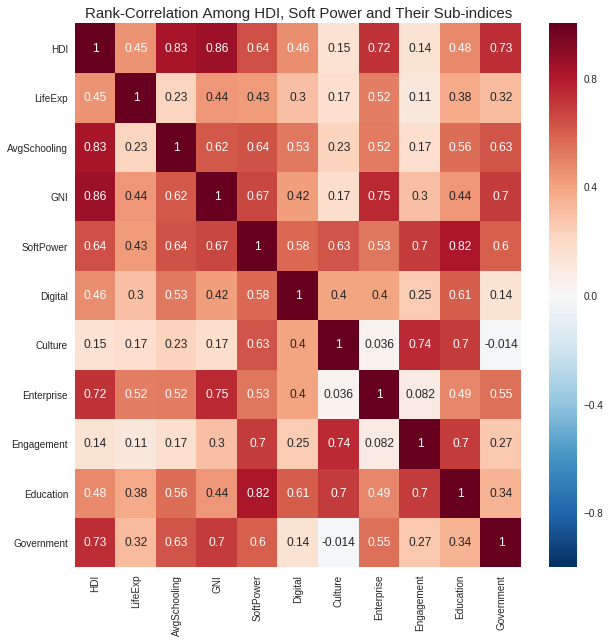

In [11]:
fig = plt.figure(figsize=(10,10))
plt.title('Rank-Correlation Among HDI, Soft Power and Their Sub-indices', size=15)
sns.heatmap(rhoHDIvSoft,annot=True, annot_kws={"size":12});

Since Pandas does not calculate the p-values related to the significance of the correlation tests, we need to get that information from the SciPy module.

In [12]:
import scipy.stats as sp

In [13]:
rho, p_value = sp.spearmanr(HDIvSoft)
p_value;   # hidden from the output for clarity

We can state that there is a strong, positive monotonic correlation between pairs of indices which have a p-value of less than some threshold, such as 0.01. These are the whitish areas plotted below. Note that the heatmap for p-values is almost the reverse of the heatmap for rank correlations.

In [14]:
rho[0,[4,7,10]]   # 0:HDI, 4:SoftPower, 7:Enterprise, 10:Government

array([ 0.6433738 ,  0.720819  ,  0.73439417])

We notice that, the rank correlation of *HDI* with *Soft Power* is  **0.64** whereas
with *Enterprise* it is **0.72** and with *Government* is **0.73**. The *p-values* are much less than **1/1000** so the results are **statistically significant**, meaning a high Human Development Index is more highly likely to be found in countries where the Government and Enterprise sub-indices are high. This holds true for the overall Soft Power index too, albeit to a lesser degree.

In [15]:
p_value[0,[4,7,10]]

array([  1.25515481e-04,   7.02771182e-06,   3.83985161e-06])

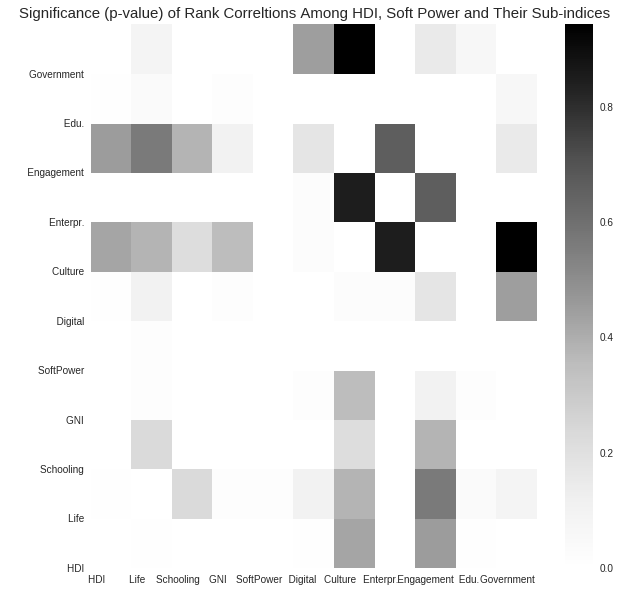

In [16]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
plt.title('Significance (p-value) of Rank Correltions Among HDI, Soft Power and Their Sub-indices', size=15)
labels=["    HDI","    Life","    Schooling","    GNI","    SoftPower",
        "      Digital","    Culture","    Enterpr.","       Engagement","         Edu.","        Government"]
ax1.set(xticks=np.arange(len(labels)), xticklabels=labels)
ax1.set(yticks=np.arange(len(labels)), yticklabels=labels)
plt.pcolor(p_value)
plt.colorbar();

In [17]:
tauHDIvSoft = HDIvSoft.corr(method='kendall')
tauHDIvSoft

,HDI,LifeExp,AvgSchooling,GNI,SoftPower,Digital,Culture,Enterprise,Engagement,Education,Government
HDI,1.000000,0.299078,0.661255,0.701273,0.456750,0.332182,0.087659,0.549023,0.083045,0.309114,0.585932
LifeExp,0.299078,1.000000,0.156913,0.321330,0.293388,0.214220,0.102453,0.372557,0.069854,0.232848,0.228191
AvgSchooling,0.661255,0.156913,1.000000,0.439314,0.494806,0.388446,0.124858,0.323705,0.101736,0.397695,0.467060
GNI,0.701273,0.321330,0.439314,1.000000,0.494253,0.278161,0.108046,0.595402,0.177011,0.291954,0.641379
SoftPower,0.456750,0.293388,0.494806,0.494253,1.000000,0.443678,0.448276,0.347126,0.517241,0.650575,0.439080
Digital,0.332182,0.214220,0.388446,0.278161,0.443678,1.000000,0.305747,0.241379,0.154023,0.443678,0.075862
Culture,0.087659,0.102453,0.124858,0.108046,0.448276,0.305747,1.000000,0.034483,0.554023,0.503448,-0.020690
Enterprise,0.549023,0.372557,0.323705,0.595402,0.347126,0.241379,0.034483,1.000000,0.048276,0.328736,0.448276
Engagement,0.083045,0.069854,0.101736,0.177011,0.517241,0.154023,0.554023,0.048276,1.000000,0.489655,0.167816
Education,0.309114,0.232848,0.397695,0.291954,0.650575,0.443678,0.503448,0.328736,0.489655,1.000000,0.209195


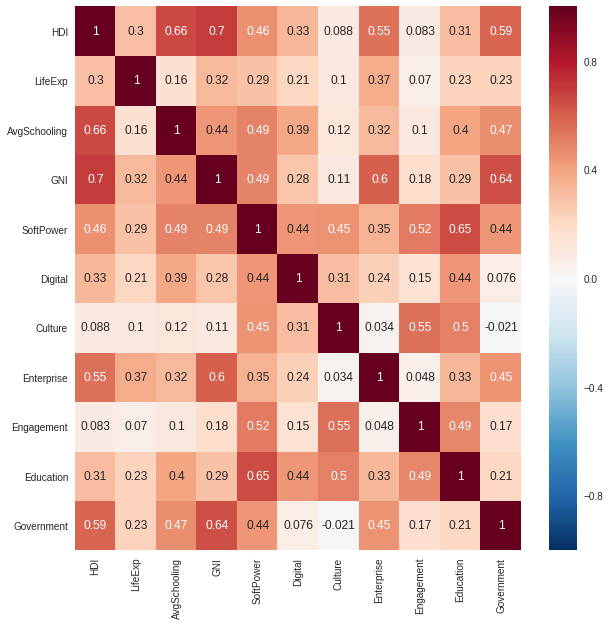

In [18]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(tauHDIvSoft,annot=True, annot_kws={"size":12});

In [19]:
tau, p_value = sp.kendalltau(HDIvSoft.HDI, HDIvSoft.SoftPower)  
# unfortunately SciPy's kendalltau() function makes pair-wise calculations only, manual work ahead!  

In [20]:
p_value   # there is a strong, positive monotonic correlation between HDI and SoftPower

0.00039295800270984944

In [21]:
cols = HDIvSoft.columns
l = len(cols)
p_vals = {}
taus = {}
for c1 in range(l):   # calculate tau for all pairs of columns
    for c2 in range(c1+1):
        taus[c1,c2], p_vals[c1,c2] = sp.kendalltau(HDIvSoft.iloc[:,c1], HDIvSoft.iloc[:,c2])

In [22]:
for (pair,tau) in sorted(taus.items(), key=lambda x: -x[1] ):  
    if (tau<0.99) & (tau>0.5):print(cols[pair[0]],"-",cols[pair[1]], "[ Tau=", tau, "]")
# sort from the most correlated to see what to inspect

GNI - HDI [ Tau= 0.701272940987 ]
AvgSchooling - HDI [ Tau= 0.661254680088 ]
Education - SoftPower [ Tau= 0.650574712644 ]
Government - GNI [ Tau= 0.641379310345 ]
Enterprise - GNI [ Tau= 0.595402298851 ]
Government - HDI [ Tau= 0.585931996746 ]
Engagement - Culture [ Tau= 0.554022988506 ]
Enterprise - HDI [ Tau= 0.549022894589 ]
Engagement - SoftPower [ Tau= 0.51724137931 ]
Education - Culture [ Tau= 0.503448275862 ]


In [23]:
for (pair,p) in sorted(p_vals.items(), key=lambda x: -x[1] ):  
    if (p>0.05) & (p<0.99): print(cols[pair[0]],"-",cols[pair[1]], "[ p=", p, "]") 
# prints the statistically insignificant pairs according to tau calculations 

Government - Culture [ p= 0.87243265603 ]
Enterprise - Culture [ p= 0.788995331133 ]
Engagement - Enterprise [ p= 0.707912123572 ]
Engagement - LifeExp [ p= 0.587729425689 ]
Government - Digital [ p= 0.55602630271 ]
Engagement - HDI [ p= 0.519249073365 ]
Culture - HDI [ p= 0.496308755995 ]
Engagement - AvgSchooling [ p= 0.429787033116 ]
Culture - LifeExp [ p= 0.426541960157 ]
Culture - GNI [ p= 0.401733984747 ]
Culture - AvgSchooling [ p= 0.332544833137 ]
Engagement - Digital [ p= 0.231950684948 ]
AvgSchooling - LifeExp [ p= 0.223309715324 ]
Government - Engagement [ p= 0.192781312833 ]
Engagement - GNI [ p= 0.169516404572 ]
Government - Education [ p= 0.104475348678 ]
Digital - LifeExp [ p= 0.0964065739685 ]
Government - LifeExp [ p= 0.0765680587804 ]
Education - LifeExp [ p= 0.0707470450131 ]
Enterprise - Digital [ p= 0.0610258374386 ]


The scatter plots of the three positive associations mentioned above are depicted using the function  **scatterTwoSeries(s1, s2)** as defined below:

In [24]:
def scatterTwoSeries(series1, series2, dataframe):
    fig = plt.figure(figsize=(10,10))
    X = series1#.values
    Y = series2#.values
    ax = sns.regplot(x=X, y=Y, label="Country", data=dataframe)
    for i, ctr in enumerate(countries.Country):
        ax.annotate(ctr, (X[i],Y[i]),size=10)

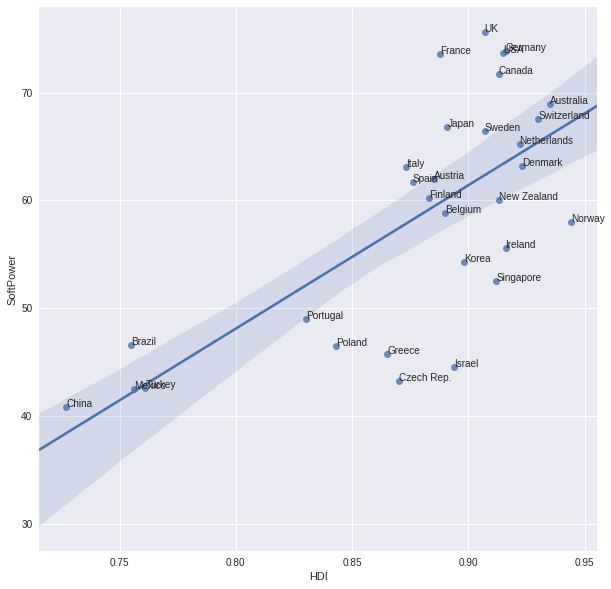

In [25]:
scatterTwoSeries(countries.HDI, countries.SoftPower, countries)

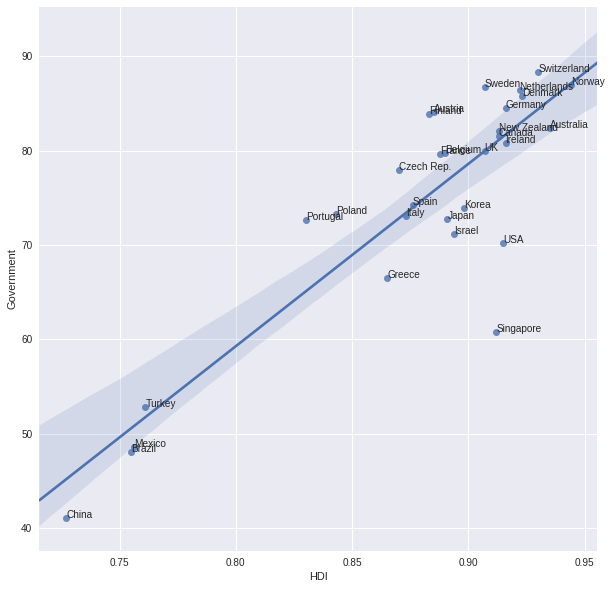

In [26]:
scatterTwoSeries(countries.HDI, countries.Government, countries)

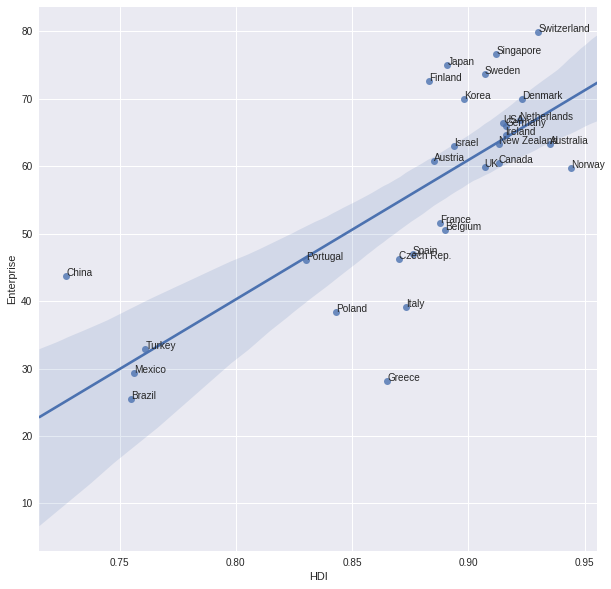

In [27]:
scatterTwoSeries(countries.HDI, countries.Enterprise, countries)

## Are Highly-Developed People More Innovative?

*Cornell University*, *INSEAD* and *World Intellectual Property Organization* have ranked the innovation performance of 141 countries and economies around the world, based on 79 indicators via **Global Innovation Index** (**GII**). GII is calculated using the following factors:

![alt text](./GII-Framework-2015.png "Calculating the Global Innovation Index")

Before moving on to compare with HDI, let us briefly see  GII’s relation with the economy, which itself is a component of HDI. We notice that GII is positively correlated with GDP per person, but there are significant underperformers having the same GDP. In particular, some African countries are doing well given their poverty!

![alt text](./InnovationIdxECN.png "Global Innovation Index vs GDP")

What about the quality of innovation? From the chart below, we see China is filing a lot of patents but still way behind America and other rich countries in terms of innovation quality. Regrettably we also notice that Turkey is patent-poor.

![alt text](./InnovationQECN.png "Innovation Quality Breakdown")

We have 30 countries to plot the innovation index GII with respect to the human development index HDI, as in the following graph:

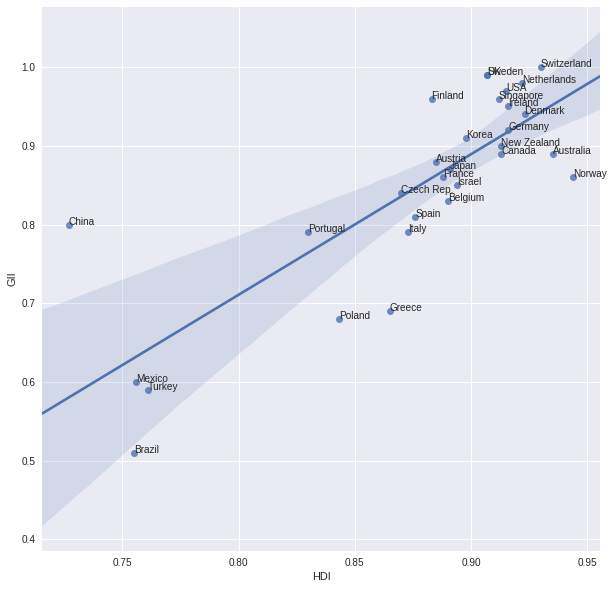

In [28]:
scatterTwoSeries(countries.HDI, countries.GII, countries)

We can see a clear pattern showing increased HDI is associated with increased GII as the two indices are defined and measured. To get a more formal confirmation, let us calculate the rank correlations. However, this time we shall include countries for which SoftPower index is not defined, increasing our sample size from 30 to 141.

In [29]:
countriesExt = pd.read_csv("GIIvHDIExtended.csv")

In [30]:
countriesExt.head()

,Country,GII,HDI
0,Albania,0.39,0.732766
1,Algeria,0.11,0.735624
2,Angola,0.15,0.531591
3,Argentina,0.49,0.835572
4,Armenia,0.57,0.732983


In [31]:
countriesExt.describe()

,GII,HDI
count,141.00000,141.000000
mean,0.50000,0.718149
std,0.29178,0.150593
min,0.00000,0.348254
25%,0.25000,0.624456
50%,0.50000,0.748329
75%,0.75000,0.837274
max,1.00000,0.943877


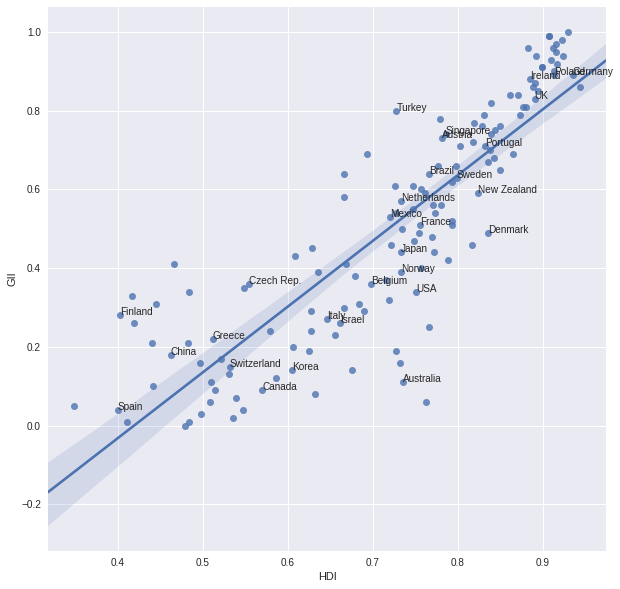

In [32]:
scatterTwoSeries(countriesExt.HDI, countriesExt.GII, countriesExt)

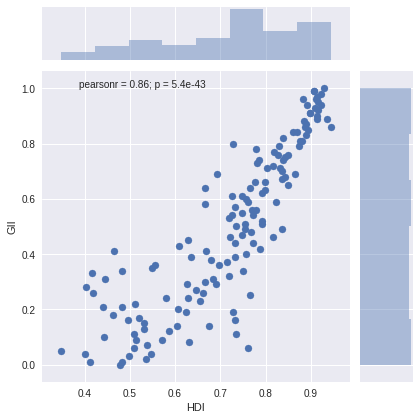

In [33]:
sns.jointplot(x="HDI", y="GII", data=countriesExt);

In [34]:
corHDIvGII = countriesExt.loc[:,["HDI","GII"]].corr(method='spearman')
corHDIvGII

,HDI,GII
HDI,1.000000,0.894499
GII,0.894499,1.000000


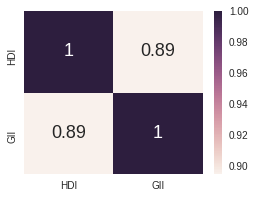

In [35]:
import seaborn as sns
fig = plt.figure(figsize=(4,3))
sns.heatmap(corHDIvGII,annot=True, annot_kws={"size":18});

In [36]:
rho, p_value = sp.spearmanr(countriesExt.loc[:,["HDI","GII"]])

In [37]:
rho, p_value

(0.8944986736513223, 1.9036426221301495e-50)

This is the result we have been expecting! **High human development leads to, or more correctly, is strongly associated with, more and better innovation.** The high **rank correleation of 89% is highly significant**, with an extremely low p-value. We have demonstrated the usefulness of HDI, at least shown the name lives up to expectations and its implications are intuitive. HDI is a very simple, easy-to-calculate metric implying many desirable properties for each country where human quality would matter. However, the size of a country is a determinant of its potential as well as the quality of its people. Therefore the comparison between an index focused on individuals to indices regarding cumulative effects have natural limitations.

## Finally, Analysing the Rank Correlation Visually

We could carry out the ranking analysis described previously in another more intuitive way by employing an interactive dashboard created using  D3JS as depicted in the following figure. The parallel axes represent the values to be used in ranking. Since **the axes are draggable**, the relation between any two ranking dimensions can be visually analyzed without much effort by placing them next to each other. A **high rank correlation would require minimal line crossings** and moving further out-of-place is penalized more severely by *Spearman’s Rho* than *Kendall’s Tau*. One can also **trace the performance of selected countries falling within specified ranges in any number of  dimensions** and see how they score in other dimensions. The output of such an analysis is pictured below. Click the link below for a live demonstration!

[Rankings Dashboard](Dashboard.html)

![alt text](./InteractiveDashboard.jpg "Visually Exploring Rank Correlations")